<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/sm_aut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [412]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [413]:
import warnings

warnings.filterwarnings('ignore')

input

In [414]:
df = pd.read_csv("sm_aut.csv")

exploratory

In [415]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        98 non-null     int64
 1   Problem Solving  98 non-null     int64
 2   Interaction      98 non-null     int64
 3   Impact           98 non-null     int64
dtypes: int64(4)
memory usage: 3.2 KB


In [416]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact
0,300,65,106,169
1,300,65,106,169
2,300,65,106,169
3,300,65,106,169
4,300,65,106,169


checks

In [417]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact
count,98.000000,98.000000,98.000000,98.000000
mean,216.846939,79.561224,81.887755,179.795918
std,83.339370,25.101882,20.751292,22.683824
min,94.000000,48.000000,49.000000,128.000000
25%,94.000000,65.000000,66.000000,159.250000
50%,265.000000,65.000000,66.000000,184.000000
75%,300.000000,117.000000,106.000000,197.000000
max,300.000000,117.000000,150.000000,213.000000


In [418]:
X=df

Scaling

In [419]:
cols = X.columns

In [420]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [421]:
X = pd.DataFrame(X, columns=[cols])

In [422]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact
0,1.0,0.246377,0.564356,0.482353
1,1.0,0.246377,0.564356,0.482353
2,1.0,0.246377,0.564356,0.482353
3,1.0,0.246377,0.564356,0.482353
4,1.0,0.246377,0.564356,0.482353


In [423]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact
0,1.000000,0.246377,0.564356,0.482353
1,1.000000,0.246377,0.564356,0.482353
2,1.000000,0.246377,0.564356,0.482353
3,1.000000,0.246377,0.564356,0.482353
4,1.000000,0.246377,0.564356,0.482353
...,...,...,...,...
93,0.441748,0.246377,0.168317,0.317647
94,0.830097,0.565217,0.168317,0.658824
95,0.830097,1.000000,0.168317,0.858824
96,0.830097,0.565217,0.168317,0.658824


K means

In [424]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [425]:
kmeans.cluster_centers_

array([[0.8738647 , 0.58087892, 0.39188758, 0.64041746],
       [0.11839266, 0.24476651, 0.21149615, 0.55588235]])

inertia

In [426]:
kmeans.inertia_

23.240709996641097

Elbow

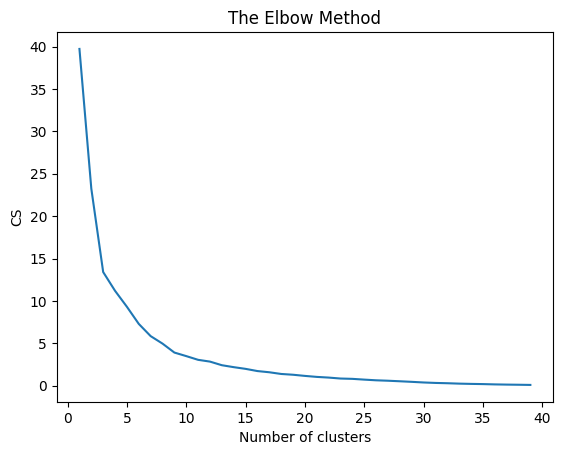

In [427]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

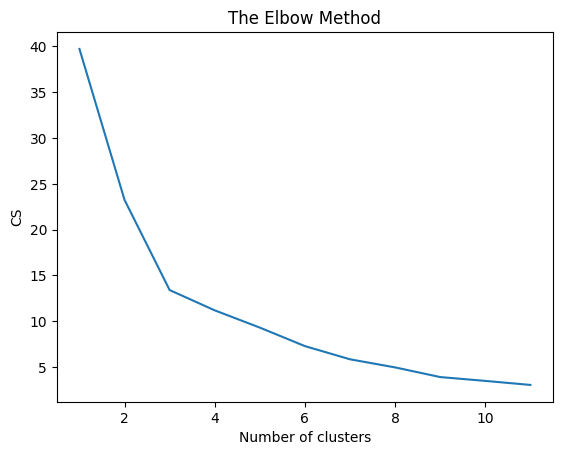

In [428]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [429]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=102) 

kmeans.fit(X)

KMeans(n_clusters=3, random_state=102)

In [430]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('sm_aut_l.csv')
print(labels)

[2 2 2 2 2 1 0 0 0 0 0 1 1 2 0 0 0 1 1 1 1 0 0 2 0 2 1 0 1 1 0 1 2 2 1 1 0
 0 0 1 1 1 1 1 2 0 0 2 2 2 2 1 2 2 2 2 0 2 2 2 1 0 1 2 2 2 1 1 2 1 1 1 1 1
 0 0 0 0 0 0 2 0 2 0 0 2 2 2 2 1 2 2 0 0 1 1 1 1]


In [431]:
Z=kmeans.cluster_centers_
Z

array([[0.11024115, 0.15100514, 0.19418716, 0.55066414],
       [0.6693145 , 0.90777339, 0.22742274, 0.5087344 ],
       [0.96873215, 0.29965899, 0.54076878, 0.76055363]])

[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 98 samples in 0.001s...
[t-SNE] Computed neighbors for 98 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 98 / 98
[t-SNE] Mean sigma: 0.833014
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.321793
[t-SNE] KL divergence after 5000 iterations: -0.798450


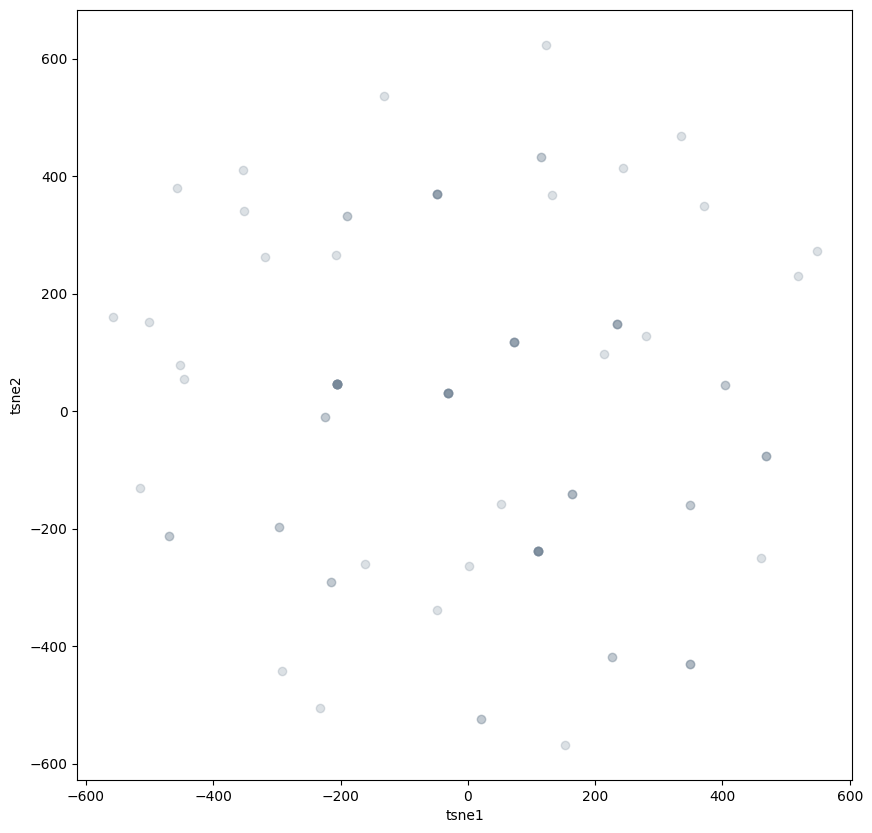

In [432]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [433]:
import matplotlib

In [434]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 98 samples in 0.000s...
[t-SNE] Computed neighbors for 98 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 98 / 98
[t-SNE] Mean sigma: 0.833014
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.146942
[t-SNE] KL divergence after 2500 iterations: -0.826691


In [435]:
np.unique(labels)


array([0, 1, 2], dtype=int32)

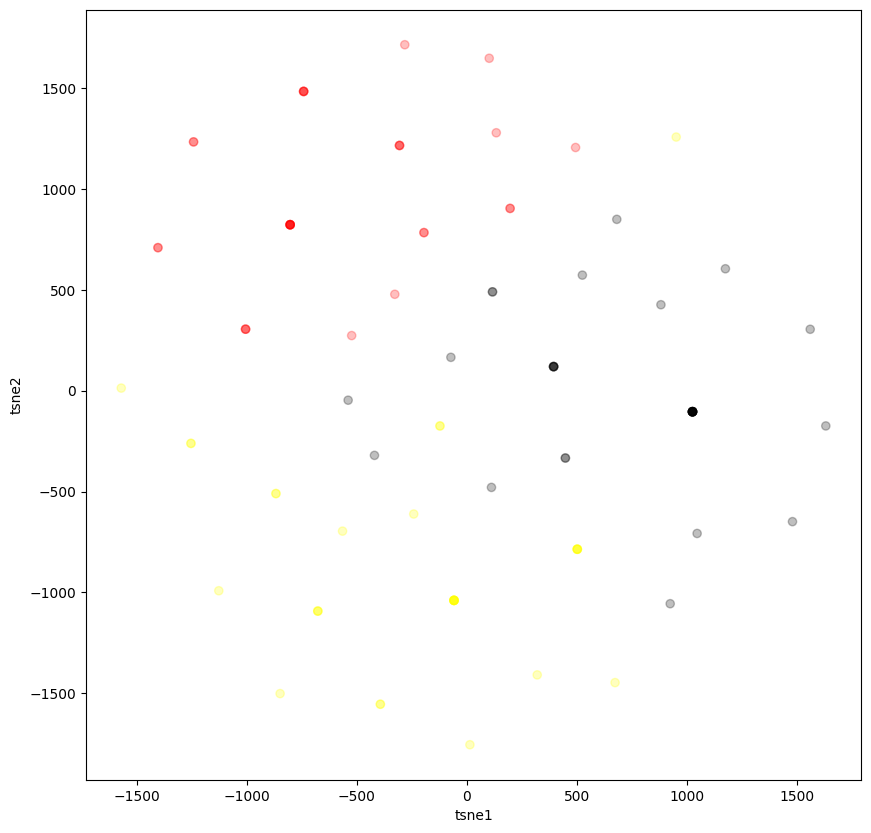

In [436]:
colors = ["red","green","purple","yellow","cyan","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [437]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_sm_aut.csv')
Z2

array([[116.70967742,  58.41935484,  68.61290323, 174.80645161],
       [231.87878788, 110.63636364,  71.96969697, 171.24242424],
       [293.55882353,  68.67647059, 103.61764706, 192.64705882]])

In [446]:
P = pd.read_csv("tr.csv")
P3=P[["Knowledge","Problem Solving","Interaction","Impact"]]
P3.dropna(inplace=True)
P3 = ms.fit_transform(P3)
P2=kmeans.predict(P3)
P2

array([2, 0, 2, 0], dtype=int32)